In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [2]:
df = pd.read_csv('../sat.trn',header=None,sep = '\s')

In [3]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
y[y==7] = 6
for i in range(6):
    y[y == (i + 1)] = i

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
numbers = [*range(6)]
list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    print(digit, len(li))

0 1072
1 479
2 961
3 415
4 470
5 1038


In [6]:
def get_winner(class1, class2):
    
    numbers = [*range(6)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 20)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-satellite2")
    [stats, winner] = run(config_path)
    
    return winner

In [7]:
winner_list = []

for class1 in range(0,5):
    for class2 in range(class1+1,6):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

number of class1:1072
number of class2:479

 ****** Running generation 0 ****** 

Population's average fitness: 0.40740 stdev: 0.19884
Best fitness: 0.96647 - size: (2, 7) - species 1 - id 6
Average adjusted fitness: 0.357
Mean genetic distance 2.801, standard deviation 0.483
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 5.171 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.48405 stdev: 0.23813
Best fitness: 0.96647 - size: (2, 7) - species 1 - id 6
Average adjusted fitness: 0.462
Mean genetic distance 2.934, standard deviation 0.502
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 4.304 sec (4.737 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57292 stdev: 0.22541
Best fitness: 0.96647 - size: (2, 7) - species 1 - id 6
Average adjusted fitness: 0.533
Mean genetic distance 3.021, standard deviation 0.552
Population of 202 members in 23 species
Total extinctions: 0
Ge

Population's average fitness: 0.54194 stdev: 0.09662
Best fitness: 0.95622 - size: (2, 7) - species 7 - id 162
Average adjusted fitness: 0.070
Mean genetic distance 2.893, standard deviation 0.527
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 5.803 sec (5.310 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.54663 stdev: 0.10805
Best fitness: 0.95622 - size: (2, 7) - species 7 - id 162
Average adjusted fitness: 0.126
Mean genetic distance 2.935, standard deviation 0.537
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 5.854 sec (5.401 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.55410 stdev: 0.11495
Best fitness: 0.97245 - size: (4, 11) - species 8 - id 1171
Average adjusted fitness: 0.137
Mean genetic distance 2.942, standard deviation 0.532
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 6.711 sec (5.588 average)

 ****** Running 

Population's average fitness: 0.58208 stdev: 0.22567
Best fitness: 0.97445 - size: (3, 8) - species 32 - id 519
Average adjusted fitness: 0.501
Mean genetic distance 3.039, standard deviation 0.505
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 4.413 sec (4.544 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60325 stdev: 0.22584
Best fitness: 0.97445 - size: (3, 8) - species 32 - id 519
Average adjusted fitness: 0.530
Mean genetic distance 3.072, standard deviation 0.504
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 4.601 sec (4.549 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60952 stdev: 0.22884
Best fitness: 0.98117 - size: (6, 15) - species 2 - id 1646
Average adjusted fitness: 0.521
Mean genetic distance 3.058, standard deviation 0.511
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 4.613 sec (4.666 average)

 ****** Runni

Population's average fitness: 0.58152 stdev: 0.22048
Best fitness: 0.95655 - size: (4, 11) - species 21 - id 986
Average adjusted fitness: 0.343
Mean genetic distance 2.990, standard deviation 0.518
Population of 208 members in 32 species
Total extinctions: 0
Generation time: 4.785 sec (5.001 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.56157 stdev: 0.22484
Best fitness: 0.95655 - size: (4, 11) - species 21 - id 986
Average adjusted fitness: 0.379
Mean genetic distance 3.016, standard deviation 0.524
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 5.084 sec (5.086 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.56915 stdev: 0.22492
Best fitness: 0.95655 - size: (4, 11) - species 21 - id 986
Average adjusted fitness: 0.347
Mean genetic distance 3.000, standard deviation 0.519
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 5.510 sec (5.211 average)

 ****** Ru

Population's average fitness: 0.61732 stdev: 0.17911
Best fitness: 0.97678 - size: (4, 11) - species 4 - id 2241
Average adjusted fitness: 0.403
Mean genetic distance 3.201, standard deviation 0.533
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 6.989 sec (7.062 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60546 stdev: 0.17569
Best fitness: 0.97678 - size: (4, 11) - species 4 - id 2241
Average adjusted fitness: 0.395
Mean genetic distance 3.211, standard deviation 0.542
Population of 188 members in 33 species
Total extinctions: 0
Generation time: 7.824 sec (6.954 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61438 stdev: 0.18461
Best fitness: 0.97678 - size: (4, 11) - species 4 - id 2241
Average adjusted fitness: 0.273
Mean genetic distance 3.194, standard deviation 0.551
Population of 191 members in 30 species
Total extinctions: 0
Generation time: 6.444 sec (6.834 average)

 ****** Ru


 ****** Running generation 0 ****** 

Population's average fitness: 0.48838 stdev: 0.11475
Best fitness: 0.94519 - size: (2, 7) - species 1 - id 159
Average adjusted fitness: 0.407
Mean genetic distance 2.784, standard deviation 0.479
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 2.146 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51016 stdev: 0.14588
Best fitness: 0.96980 - size: (2, 8) - species 5 - id 270
Average adjusted fitness: 0.446
Mean genetic distance 2.870, standard deviation 0.483
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 2.350 sec (2.248 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55109 stdev: 0.15782
Best fitness: 0.96980 - size: (2, 8) - species 5 - id 270
Average adjusted fitness: 0.462
Mean genetic distance 2.920, standard deviation 0.519
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 2.474 sec (2.323 avera

Population's average fitness: 0.56678 stdev: 0.14424
Best fitness: 0.91043 - size: (3, 9) - species 12 - id 397
Average adjusted fitness: 0.452
Mean genetic distance 2.911, standard deviation 0.511
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 2.786 sec (2.562 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58337 stdev: 0.15384
Best fitness: 0.93045 - size: (5, 12) - species 11 - id 890
Average adjusted fitness: 0.420
Mean genetic distance 2.965, standard deviation 0.497
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 2.869 sec (2.613 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58803 stdev: 0.15402
Best fitness: 0.93045 - size: (5, 12) - species 11 - id 890
Average adjusted fitness: 0.411
Mean genetic distance 3.015, standard deviation 0.488
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 2.916 sec (2.656 average)

 ****** Runni

Population's average fitness: 0.64684 stdev: 0.24943
Best fitness: 0.97956 - size: (4, 12) - species 10 - id 1298
Average adjusted fitness: 0.612
Mean genetic distance 3.097, standard deviation 0.546
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 6.596 sec (5.092 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.68401 stdev: 0.23140
Best fitness: 0.97956 - size: (4, 12) - species 10 - id 1298
Average adjusted fitness: 0.593
Mean genetic distance 3.116, standard deviation 0.547
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 4.787 sec (5.062 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.68486 stdev: 0.24358
Best fitness: 0.97956 - size: (4, 12) - species 10 - id 1298
Average adjusted fitness: 0.376
Mean genetic distance 3.101, standard deviation 0.535
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 4.706 sec (5.178 average)

 ****** 

Population's average fitness: 0.58887 stdev: 0.17615
Best fitness: 0.70930 - size: (5, 13) - species 13 - id 1663
Average adjusted fitness: 0.293
Mean genetic distance 3.025, standard deviation 0.471
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 4.338 sec (4.615 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.58989 stdev: 0.17547
Best fitness: 0.70930 - size: (5, 13) - species 13 - id 1663
Average adjusted fitness: 0.288
Mean genetic distance 3.053, standard deviation 0.479
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 4.303 sec (4.664 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.58223 stdev: 0.17843
Best fitness: 0.70930 - size: (5, 13) - species 13 - id 1663
Average adjusted fitness: 0.288
Mean genetic distance 3.070, standard deviation 0.480
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 4.674 sec (4.723 average)

 ******

Population's average fitness: 0.59930 stdev: 0.21473
Best fitness: 0.95388 - size: (3, 10) - species 11 - id 2323
Average adjusted fitness: 0.426
Mean genetic distance 3.147, standard deviation 0.473
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 4.315 sec (5.206 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62187 stdev: 0.20146
Best fitness: 0.95388 - size: (3, 10) - species 11 - id 2323
Average adjusted fitness: 0.485
Mean genetic distance 3.160, standard deviation 0.464
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 4.514 sec (4.802 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60169 stdev: 0.21058
Best fitness: 0.95388 - size: (3, 10) - species 11 - id 2323
Average adjusted fitness: 0.421
Mean genetic distance 3.172, standard deviation 0.481
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 4.419 sec (4.705 average)

 ******

Population's average fitness: 0.50494 stdev: 0.06209
Best fitness: 0.65537 - size: (2, 7) - species 2 - id 139
Average adjusted fitness: 0.350
Mean genetic distance 2.822, standard deviation 0.484
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 2.008 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51990 stdev: 0.04437
Best fitness: 0.75367 - size: (2, 6) - species 5 - id 368
Average adjusted fitness: 0.284
Mean genetic distance 2.848, standard deviation 0.516
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 2.231 sec (2.120 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52564 stdev: 0.05592
Best fitness: 0.80000 - size: (3, 10) - species 11 - id 475
Average adjusted fitness: 0.264
Mean genetic distance 2.847, standard deviation 0.489
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 2.379 sec (2.206 average)

 ****** Running generation 3 ***

Population's average fitness: 0.57960 stdev: 0.19705
Best fitness: 0.72746 - size: (3, 9) - species 7 - id 272
Average adjusted fitness: 0.265
Mean genetic distance 3.055, standard deviation 0.529
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 3.989 sec (3.860 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60982 stdev: 0.18040
Best fitness: 0.72746 - size: (3, 9) - species 7 - id 272
Average adjusted fitness: 0.304
Mean genetic distance 3.029, standard deviation 0.531
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 4.186 sec (3.914 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63460 stdev: 0.16370
Best fitness: 0.72746 - size: (3, 9) - species 7 - id 272
Average adjusted fitness: 0.334
Mean genetic distance 3.018, standard deviation 0.534
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 4.264 sec (3.964 average)

 ****** Running ge

Population's average fitness: 0.59947 stdev: 0.19699
Best fitness: 0.89854 - size: (3, 9) - species 28 - id 365
Average adjusted fitness: 0.476
Mean genetic distance 3.075, standard deviation 0.530
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 4.362 sec (4.517 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61804 stdev: 0.18946
Best fitness: 0.89854 - size: (3, 9) - species 28 - id 365
Average adjusted fitness: 0.476
Mean genetic distance 3.065, standard deviation 0.530
Population of 193 members in 35 species
Total extinctions: 0
Generation time: 5.580 sec (4.623 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60888 stdev: 0.19309
Best fitness: 0.89854 - size: (3, 9) - species 28 - id 365
Average adjusted fitness: 0.392
Mean genetic distance 3.084, standard deviation 0.527
Population of 193 members in 35 species
Total extinctions: 0
Generation time: 4.502 sec (4.716 average)

 ****** Runnin

In [8]:
classes = []
for class1 in range(0,5):
    for class2 in range(class1+1, 6):
        classes.append([class1, class2])

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-satellite2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
test_df = pd.read_csv('../sat.tst',header=None,sep = '\s')

testX = test_df.iloc[:,:-1].to_numpy()
testy = test_df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
testy[testy==7] = 6
for i in range(6):
    testy[testy == (i + 1)] = i

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(6)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    
    
    return pred_outputs

In [12]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []

for j in range(2000):
    pred = []
    vote = [0,0,0,0,0,0]
    for i in range(15):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1 #1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [13]:
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [14]:
np.sum(list_P == testy)/2000

0.711

In [15]:
for i,p_value in enumerate(pred_value):
    print("#{} index:{} real:{}".format(i, p_value[0], testy[i]))

#0 index:[2] real:2
#1 index:[2] real:2
#2 index:[2] real:3
#3 index:[2] real:3
#4 index:[2] real:3
#5 index:[2] real:3
#6 index:[2] real:3
#7 index:[2] real:3
#8 index:[2] real:3
#9 index:[2] real:3
#10 index:[2] real:3
#11 index:[2] real:3
#12 index:[2] real:3
#13 index:[2] real:3
#14 index:[2] real:2
#15 index:[2] real:2
#16 index:[2] real:2
#17 index:[2] real:2
#18 index:[2] real:2
#19 index:[2] real:2
#20 index:[2] real:2
#21 index:[2] real:2
#22 index:[2] real:2
#23 index:[2] real:2
#24 index:[2] real:2
#25 index:[2] real:2
#26 index:[2] real:2
#27 index:[4] real:4
#28 index:[5] real:5
#29 index:[5] real:5
#30 index:[3] real:5
#31 index:[4] real:4
#32 index:[2] real:2
#33 index:[2] real:2
#34 index:[2] real:3
#35 index:[2] real:3
#36 index:[2] real:3
#37 index:[2] real:3
#38 index:[2] real:3
#39 index:[5] real:3
#40 index:[5] real:3
#41 index:[4] real:3
#42 index:[2] real:2
#43 index:[2] real:2
#44 index:[2] real:2
#45 index:[2] real:2
#46 index:[2] real:2
#47 index:[2] real:2
#4

#437 index:[5] real:5
#438 index:[5] real:2
#439 index:[5] real:2
#440 index:[5] real:2
#441 index:[5] real:2
#442 index:[5] real:3
#443 index:[2] real:3
#444 index:[1] real:1
#445 index:[1] real:1
#446 index:[1] real:1
#447 index:[1] real:1
#448 index:[1] real:1
#449 index:[2] real:2
#450 index:[2] real:2
#451 index:[2] real:2
#452 index:[5] real:2
#453 index:[5] real:5
#454 index:[5] real:5
#455 index:[5] real:4
#456 index:[5] real:4
#457 index:[4] real:4
#458 index:[4] real:4
#459 index:[4] real:4
#460 index:[4 5] real:4
#461 index:[5] real:4
#462 index:[4] real:4
#463 index:[4] real:4
#464 index:[4] real:4
#465 index:[4] real:5
#466 index:[3] real:5
#467 index:[5] real:3
#468 index:[2] real:3
#469 index:[2] real:3
#470 index:[5] real:3
#471 index:[5] real:3
#472 index:[5] real:3
#473 index:[5] real:3
#474 index:[1] real:1
#475 index:[1] real:1
#476 index:[1] real:1
#477 index:[1] real:1
#478 index:[1] real:1
#479 index:[1] real:1
#480 index:[1] real:1
#481 index:[1] real:1
#482 ind

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)
print(cm)

[[448   1   4   0  18   0]
 [  0 201   0   0  13   0]
 [  9   0 339 126   4 177]
 [  3   2  16  17  11  17]
 [  1  18   0   6 161  20]
 [  0   2  38  62  30 256]]


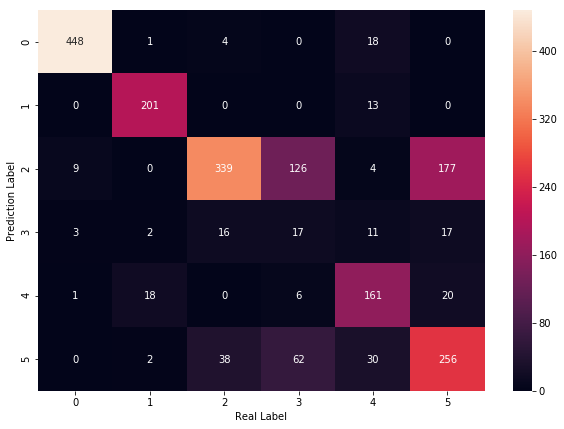

In [17]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "012345"],
                  columns = [i for i in "012345"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()